In [1]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

aitia = App()

In [2]:
lucas_data = aitia.data.lucas2_data()
lucas_data

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,0,0,1,1,0,1,1
1996,1,1,1,0,0,0,0,0,1,0,1,1
1997,1,1,0,1,0,0,1,0,1,0,0,1
1998,1,1,1,0,1,1,0,1,1,0,1,1


In [3]:
aitia.pc_util.pc.start_vm()

In [8]:
analysis_results, summary = aitia.run_analysis(lucas_data, target_graph_str=None, pc=aitia.pc_util.pc)
summary

Continuous Data: expect 12 variables but found 0.


Continuous Data: expect 12 variables but found 0.


Continuous Data: expect 12 variables but found 0.


Continuous Data: expect 12 variables but found 0.


Continuous Data: expect 12 variables but found 0.


Continuous Data: expect 12 variables but found 0.


,Algorithm,Isomorphic to Target?,AURC,SHD
0,BayesEst,NA,0,0
1,FCI,NA,0,0
2,PC,NA,0,0
3,FGES-continuous,NA,0,0
4,FGES-discrete,NA,0,0
5,GFCI-continuous,NA,0,0
6,GFCI-discrete,NA,0,0
7,RFCI-continuous,NA,0,0
8,RFCI-discrete,NA,0,0


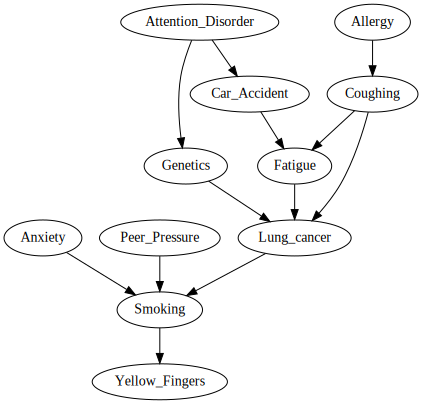

In [5]:
analysis_results[8]['causal_graph'].draw()

In [6]:
X = lucas_data
from sklearn import mixture
gmm = mixture.BayesianGaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
labels

array([3, 3, 2, ..., 2, 2, 1])

In [8]:
list(X)

['Smoking',
 'Yellow_Fingers',
 'Anxiety',
 'Peer_Pressure',
 'Genetics',
 'Attention_Disorder',
 'Born_an_Even_Day',
 'Car_Accident',
 'Fatigue',
 'Allergy',
 'Coughing',
 'Lung_cancer']

In [9]:
X.shape

(2000, 12)

In [8]:
data_new = gmm.sample(200)
X_new = pd.DataFrame(data_new[0], columns=list(X))
X_new

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,1.024534,1.014499,1.106686,0.570671,-0.248094,-0.128146,0.043002,0.883214,1.013521,0.628556,1.525750,0.996880
1,0.983291,0.980557,0.806867,0.138881,0.215866,0.829756,0.075302,0.952496,0.968629,0.263043,1.028042,0.998725
2,0.975121,0.975724,0.717177,0.983323,0.095882,0.719609,-0.464247,0.496127,0.992151,0.762626,1.077556,0.997988
3,0.997053,1.006147,0.744055,1.215868,0.460811,0.467406,-0.010009,0.969777,0.997362,0.254489,1.389440,1.004164
4,1.003604,1.004682,0.887397,-0.117375,1.079384,1.353616,0.392226,0.790836,1.010704,0.424218,1.003815,0.991414
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.941154,1.365814,-0.225996,-0.373215,-0.070222,0.476673,-0.169257,0.958559,0.743609,-0.216595,-0.244137,0.312759
196,0.976099,1.073352,1.253386,-0.580087,-0.102736,0.008664,0.888981,1.026537,0.477464,0.118994,-0.206874,0.558252
197,1.021754,1.024903,1.356943,0.182930,0.084493,0.070997,1.030193,1.442338,1.099545,-0.332247,-0.693025,0.059675
198,1.022875,1.321027,0.773962,-0.287774,-0.160287,-0.035652,1.018546,0.761517,-0.616571,0.169810,-0.399060,0.382938


In [7]:
analysis_results2, summary2 = aitia_ex.run_analysis(X_new, target_graph_str=None, pc=pc)
summary2

NameError: name 'aitia_ex' is not defined

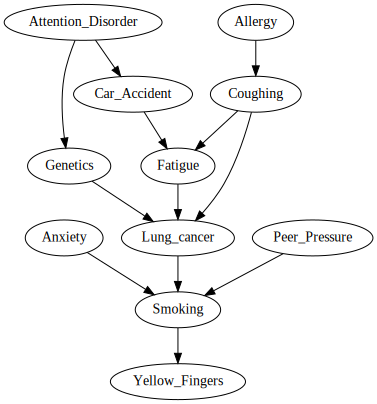

In [12]:
analysis_results[0]['causal_graph'].draw()